In [1]:
%pwd

'/content'

In [2]:
%cd /content/drive/Shareddrives/미드프로젝트1

/content/drive/Shareddrives/미드프로젝트1


In [ ]:
!pip install koreanize-matplotlib pingouin fastcluster

In [ ]:
!pip install --upgrade matplotlib

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [5]:
# 시도별 인구수
dic_시도 = {'강원도':'강원','경기도':'경기','경상남도':'경남','경상북도':'경북','광주광역시':'광주','대구광역시':'대구','대전광역시':'대전','부산광역시':'부산','서울특별시':'서울','세종특별자치시':'세종','울산광역시':'울산','인천광역시':'인천','전라남도':'전남','전라북도':'전북','제주특별자치도':'제주','충청남도':'충남','충청북도':'충북','전국':'전국'}
df_시도별_인구수 = pd.read_csv('/content/drive/Shareddrives/미드프로젝트1/data/행정구역_시군구_별__성별_인구수_20230220161519.csv', encoding='cp949')
m = df_시도별_인구수['시점'] == 2021
df_2021_시도별_인구수 = df_시도별_인구수[m].copy()
df_2021_시도별_인구수['시도'] = df_2021_시도별_인구수['행정구역(시군구)별'].apply(lambda x: dic_시도[x])
dic_시도별_인구수 = dict(zip(df_2021_시도별_인구수['시도'], df_2021_시도별_인구수['총인구수 (명)']))
dic_시도별_인구수

{'전국': 51638809,
 '서울': 9509458,
 '부산': 3350380,
 '대구': 2385412,
 '인천': 2948375,
 '광주': 1441611,
 '대전': 1452251,
 '울산': 1121592,
 '세종': 371895,
 '경기': 13565450,
 '강원': 1538492,
 '충북': 1597427,
 '충남': 2119257,
 '전북': 1786855,
 '전남': 1832803,
 '경북': 2626609,
 '경남': 3314183,
 '제주': 676759}

In [9]:
공공도서관_통계데이터 = pd.read_excel("/content/drive/Shareddrives/미드프로젝트1/최종정리/도서관/2022년 공공도서관 통계데이터 최종.xlsx")

df_개관일 = pd.read_excel('/content/drive/Shareddrives/미드프로젝트1/최종정리/도서관/공공도서관 통계데이터_개관일.xlsx', sheet_name=0, header=3)

df_개관일 = df_개관일.replace('공주시 웅진도서관','공주시 시립도서관 웅진관')
df_개관일 = df_개관일.replace('소나무언덕2호도서관','소나무언덕2호작은도서관')
df_개관일 = df_개관일.replace('소나무언덕3호도서관','소나무언덕3호 작은도서관')
df_개관일 = df_개관일.replace('송파어린이영어도서관','송파어린이영어작은도서관')
df_개관일 = df_개관일.replace('여의샛강도서관','여의샛강마을도서관')

dic_개관일수 = dict(zip(df_개관일['Unnamed: 1'],df_개관일['개관일수']))

공공도서관_통계데이터['개관일수'] = 공공도서관_통계데이터['도서관명'].apply(lambda x: int(dic_개관일수[x]))
공공도서관_통계데이터['가동률'] = (공공도서관_통계데이터['개관일수'] / 365) * 100

In [11]:
df_개관일

,Unnamed: 0,Unnamed: 1,개관일수,주당평균개관시간
0,대구 수성구,수성구립 물망이도서관,298.0,53.0
1,대구 서구,서구어린이도서관,300.0,52.0
2,대구 달서구,달서어린이도서관,296.0,52.0
3,전남 보성군,보성농어촌도서관,292.0,78.0
4,전남 강진군,강진군도서관,331.0,81.0
...,...,...,...,...
1204,경기 남양주시,남양주시 별내도서관,307.0,78.0
1205,충북 보은군,보은군립도서관,208.0,54.0
1206,경기 파주시,교하도서관,320.0,81.0
1207,충북 충주시,서충주도서관,280.0,51.0


In [10]:
공공도서관_통계데이터.shape, df_개관일.shape

((1208, 292), (1209, 4))

In [ ]:
공공도서관_통계데이터[['개관일수']]

,개관일수
0,293
1,299
2,224
3,274
4,300
...,...
1203,312
1204,278
1205,301
1206,284


In [ ]:
공공도서관_통계데이터[['오프라인_문화프로그램_1회성프로그램_실시횟수']]

,오프라인_문화프로그램_1회성프로그램_실시횟수
0,5
1,10
2,69
3,3
4,1
...,...
1203,8
1204,13
1205,2
1206,1


In [ ]:
col_자료 = 공공도서관_통계데이터.columns[공공도서관_통계데이터.columns.str.contains('도서\(인쇄\)자료수')]
공공도서관_통계데이터['도서수'] = 공공도서관_통계데이터[col_자료].sum(axis=1)
공공도서관_통계데이터[['도서수']]

,도서수
0,33990
1,52678
2,111942
3,75295
4,208764
...,...
1203,287778
1204,101718
1205,74638
1206,67488


In [ ]:
공공도서관_통계데이터[['지역','도서관명','면적_도서관건물연면적','가동률','도서수','오프라인_문화프로그램_1회성프로그램_실시횟수']].groupby('지역').sum()

,면적_도서관건물연면적,가동률,도서수,오프라인_문화프로그램_1회성프로그램_실시횟수
지역,,,,
강원,128288.44,4547.123288,4917723,492
경기,999357.30,23430.684932,34493595,947
경남,193002.28,5741.095890,8202683,611
경북,166139.73,5687.397260,6607377,492
광주,96784.23,1996.986301,2752991,218
대구,91987.60,3657.808219,4871439,991
대전,80025.36,2047.123288,3208202,403
부산,145322.91,3591.780822,6579925,459
서울,370243.28,14995.342466,16014395,1920


In [ ]:
df = 공공도서관_통계데이터[['지역','도서관명','면적_도서관건물연면적','가동률','도서수','오프라인_문화프로그램_1회성프로그램_실시횟수']].copy()
df

,지역,도서관명,면적_도서관건물연면적,가동률,도서수,오프라인_문화프로그램_1회성프로그램_실시횟수
0,대구,더불어 숲,320.60,80.273973,33990,5
1,경기,가람도서관,2103.00,81.917808,52678,10
2,대전,가양도서관,2923.30,61.369863,111942,69
3,서울,가온도서관,965.95,75.068493,75295,3
4,대전,갈마도서관,2706.00,82.191781,208764,1
...,...,...,...,...,...,...
1203,서울,서울특별시교육청어린이도서관,3796.63,85.479452,287778,8
1204,충남,아산시꿈샘어린이청소년도서관,1815.47,76.164384,101718,13
1205,경기,화성시립둥지나래어린이도서관,1619.00,82.465753,74638,2
1206,서울,서대문구립남가좌새롬어린이도서관,674.58,77.808219,67488,1


In [ ]:
dic_지역바꾸기 = {'서울특별시' : '서울',
'부산광역시' : '부산',
'대구광역시' : '대구',
'인천광역시' : '인천',
'광주광역시' : '광주',
'대전광역시' : '대전',
'울산광역시' : '울산',
'세종특별자치시' : '세종',
'경기도' : '경기',
'강원도' : '강원',
'충청북도' : '충북',
'충청남도' : '충남',
'전라북도' : '전북',
'전라남도' : '전남',
'경상북도' : '경북',
'경상남도' : '경남',
'제주특별자치도' : '제주'}

In [ ]:
시도별면적 = pd.read_excel('/content/drive/Shareddrives/미드프로젝트1/data/행정구역별_면적.xlsx')
시도별면적['지역'] = 시도별면적['광역단체'].apply(lambda x:dic_지역바꾸기[x])
시도별면적['인구수'] = 시도별면적['광역단체'].apply(lambda x:dic_시도별_인구수[dic_지역바꾸기[x]])
시도별면적 = 시도별면적.set_index('지역')
시도별면적

,광역단체,면적,인구수
지역,,,
서울,서울특별시,1.005994e+07,9509458
부산,부산광역시,2.044586e+07,3350380
대구,대구광역시,3.918336e+07,2385412
인천,인천광역시,7.981962e+07,2948375
광주,광주광역시,3.212921e+07,1441611
대전,대전광역시,2.739072e+07,1452251
울산,울산광역시,3.193301e+07,1121592
세종,세종특별자치시,3.621402e+07,371895
경기,경기도,8.856870e+08,13565450


In [ ]:
담당문화시설 = '공공도서관'
지역컬럼 = '지역'
문화시설이름명 = '도서관명'
면적컬럼 = '면적_도서관건물연면적'
가동률컬럼 = '가동률'
자료수 = '도서수'
프로그램수 = '오프라인_문화프로그램_1회성프로그램_실시횟수'

df['A'] = df[면적컬럼].astype(int) * df[가동률컬럼] 
temp_sum = df.groupby(지역컬럼)[['A']].sum()
temp_sum.columns = ['A_sum'] 

temp_avg = df.groupby(지역컬럼)[['A']].mean()  # 해당 지역에 위치한 시설들의 평균A 를 보려면
temp_avg.columns = ['A_mean']

df_그룹화 = df.groupby(지역컬럼).agg({문화시설이름명:'count', 면적컬럼:'sum', 가동률컬럼:'mean'})

자료수곱하기프로그램 = df.set_index(지역컬럼)[자료수] * df.set_index(지역컬럼)[프로그램수]
자료수곱하기프로그램.reset_index()

정리 = df_그룹화.join([temp_sum, temp_avg, 자료수곱하기프로그램.groupby(지역컬럼).sum(),자료수곱하기프로그램.groupby(지역컬럼).mean()])
정리 = 정리.reset_index()
정리.columns = ['시도명',f'{담당문화시설}명',f'{담당문화시설}_면적',f'{담당문화시설}_가동률',f'{담당문화시설}_A_sum',f'{담당문화시설}_A_mean',f'{담당문화시설}_B_sum',f'{담당문화시설}_B_mean']
정리

,시도명,공공도서관명,공공도서관_면적,공공도서관_가동률,공공도서관_A_sum,공공도서관_A_mean,공공도서관_B_sum,공공도서관_B_mean
0,강원,60,128288.44,75.785388,9.839904e+06,163998.401826,79978748,1.332979e+06
1,경기,300,999357.30,78.102283,7.983111e+07,266103.706849,135674884,4.522496e+05
2,경남,76,193002.28,75.540735,1.479715e+07,194699.387167,66160984,8.705393e+05
3,경북,70,166139.73,81.248532,1.371897e+07,195985.279843,74763286,1.068047e+06
4,광주,24,96784.23,83.207763,8.257590e+06,344066.244292,38233472,1.593061e+06
5,대구,44,91987.60,83.132005,7.814473e+06,177601.650062,237574293,5.399416e+06
6,대전,26,80025.36,78.735511,6.421389e+06,246976.501581,65807916,2.531074e+06
7,부산,49,145322.91,73.301649,1.091738e+07,222803.757339,121369503,2.476929e+06
8,서울,195,370243.28,76.899192,2.897618e+07,148595.786442,295244386,1.514074e+06
9,세종,13,25491.96,74.625922,1.328203e+06,102169.483667,1266449,9.741915e+04


In [ ]:
import math
temp_sum['면적'] = 시도별면적['면적']
temp_sum['인구수'] = 시도별면적['인구수']
temp_sum['A_sum_면적나누기'] = (temp_sum['A_sum'] / (시도별면적['면적']*시도별면적['인구수']))**(1/2)
temp_sum

,A_sum,면적,인구수,A_sum_면적나누기
지역,,,,
강원,9.839904e+06,1.027315e+09,1538492,0.000079
경기,7.983111e+07,8.856870e+08,13565450,0.000082
경남,1.479715e+07,5.915512e+08,3314183,0.000087
경북,1.371897e+07,1.239332e+09,2626609,0.000065
광주,8.257590e+06,3.212921e+07,1441611,0.000422
대구,7.814473e+06,3.918336e+07,2385412,0.000289
대전,6.421389e+06,2.739072e+07,1452251,0.000402
부산,1.091738e+07,2.044586e+07,3350380,0.000399
서울,2.897618e+07,1.005994e+07,9509458,0.000550


In [ ]:
# temp_sum.to_csv('A_면적나누기.csv')

In [ ]:
정리[['시도명','공공도서관_B_sum']]

,시도명,공공도서관_B_sum
0,강원,79978748
1,경기,135674884
2,경남,66160984
3,경북,74763286
4,광주,38233472
5,대구,237574293
6,대전,65807916
7,부산,121369503
8,서울,295244386
9,세종,1266449


Text(0, 0.5, '지수')

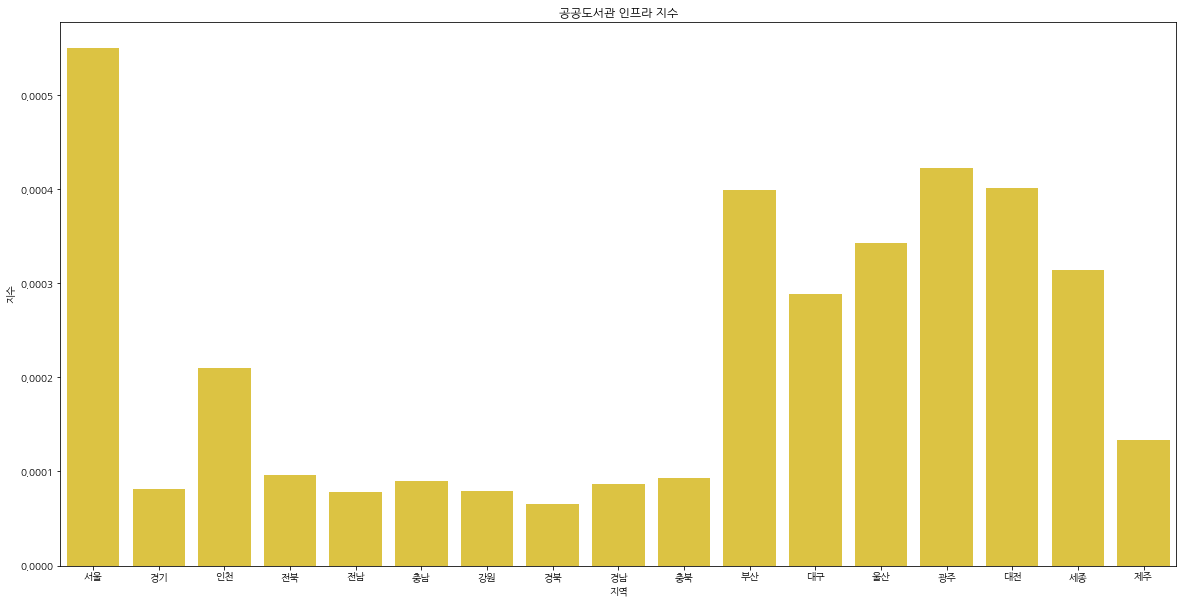

In [ ]:
영화관지수비교 = temp_sum.reset_index().copy()

for i in range(17) : 
    if 영화관지수비교.loc[i, '지역'] in ['서울', '인천', '경기'] : 
        영화관지수비교.loc[i, '지역분류'] = '수도권'
    elif 영화관지수비교.loc[i, '지역'] in ['충남', '충북', '경남', '경북', '전북', '전남', '강원'] : 
        영화관지수비교.loc[i, '지역분류'] = '지방'
    elif 영화관지수비교.loc[i, '지역'] in ['부산', '대전', '대구', '광주', '울산'] : 
        영화관지수비교.loc[i, '지역분류'] = '지방 광역시'
    else : 영화관지수비교.loc[i, '지역분류'] = '특별자치'

fig, ax = plt.subplots(
    figsize=(20,10)
)

plot1 = sns.barplot(
    x='지역',
    y='A_sum_면적나누기',
    data=영화관지수비교.sort_values('지역분류'),
    color='#F6D429',
    ax=ax
    )

plt.title('공공도서관 인프라 지수')
plt.ylabel(
    '지수')

Text(0, 0.5, '지수')

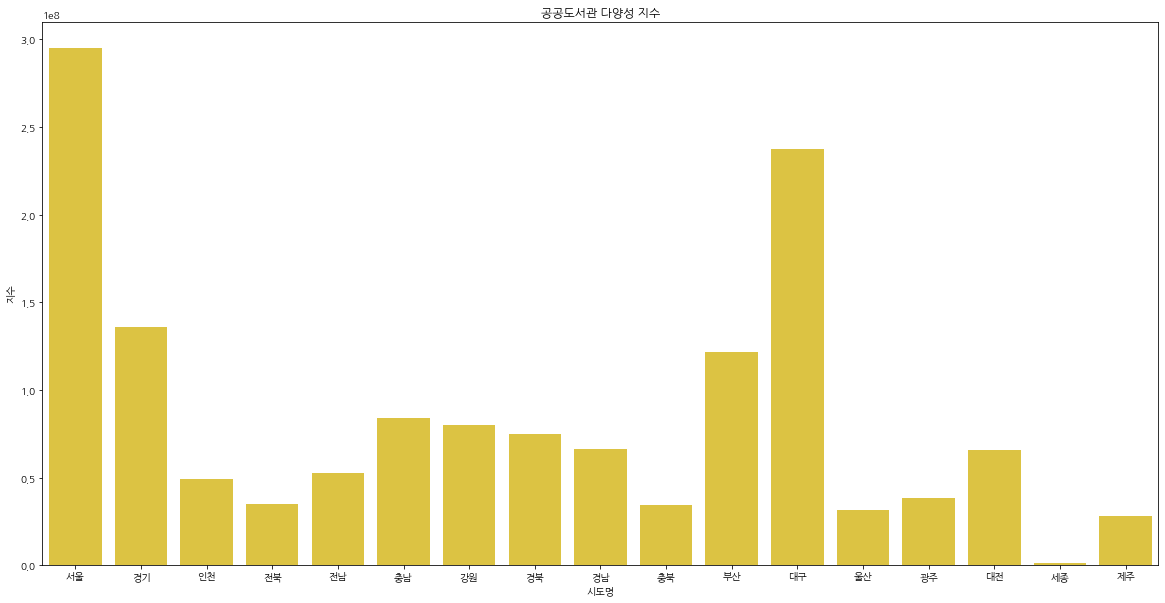

In [ ]:
영화관지수비교 = 정리[['시도명','공공도서관_B_sum']].copy()

for i in range(17) : 
    if 영화관지수비교.loc[i, '시도명'] in ['서울', '인천', '경기'] : 
        영화관지수비교.loc[i, '지역분류'] = '수도권'
    elif 영화관지수비교.loc[i, '시도명'] in ['충남', '충북', '경남', '경북', '전북', '전남', '강원'] : 
        영화관지수비교.loc[i, '지역분류'] = '지방'
    elif 영화관지수비교.loc[i, '시도명'] in ['부산', '대전', '대구', '광주', '울산'] : 
        영화관지수비교.loc[i, '지역분류'] = '지방 광역시'
    else : 영화관지수비교.loc[i, '지역분류'] = '특별자치'

fig, ax = plt.subplots(
    figsize=(20,10)
)

plot1 = sns.barplot(
    x='시도명',
    y='공공도서관_B_sum',
    data=영화관지수비교.sort_values('지역분류'),
    color='#F6D429',
    ax=ax
    )

plt.title('공공도서관 다양성 지수')
plt.ylabel(
    '지수')